# gorey 
## Telluric correction
### Part 4- Second epoch telluric correction: 20161013

Michael Gully-Santiago  
Wednesday, March 29, 2017

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [6]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

The target frame is `_0230`, the A0V standard is either frame `_0226` or `_0238`... let's go with the latter.

In [7]:
!ls ../data/raw/20161013/*0230*

../data/raw/20161013/SDCH_20161013_0230.spec.fits
../data/raw/20161013/SDCH_20161013_0230.variance.fits
../data/raw/20161013/SDCK_20161013_0230.spec.fits
../data/raw/20161013/SDCK_20161013_0230.variance.fits


In [8]:
hdu_raw = fits.open('../data/raw/20161013/SDCH_20161013_0238.spec.fits')
hdu_f   = fits.open('../data/raw/20161013/SDCH_20161013_0238.spec_flattened.fits')
hdu_var = fits.open('../data/raw/20161013/SDCH_20161013_0238.variance.fits')
hdu_tar = fits.open('../data/raw/20161013/SDCH_20161013_0230.spec.fits')
tar_var = fits.open('../data/raw/20161013/SDCH_20161013_0230.variance.fits')
hdr = hdu_tar[0].header

### Revised telluric correction
(see previous notebook)

We will now perform:
$$ f_{\star} = \frac{f_{raw, \star}}{f_{raw, std}} \times \hat{f}_{std}$$

The net uncertainty is now given by:

$$ \sigma_{\star} = f_{\star} \sqrt{ \left( \frac{\sigma_{raw, std}}{f_{raw, std}}\right)^2 + \left( \frac{\sigma_{raw, \star}}{f_{raw,\star}} \right)^2 } \times \hat{f}_{std}$$

In [12]:
hdu_f

In [9]:
f_hat_std = hdu_f[4].data/np.nanmean(hdu_f[4].data)
f_star = hdu_tar[0].data/hdu_raw[0].data*f_hat_std

term1 = hdu_var[0].data / hdu_raw[0].data**2
term2 = tar_var[0].data / hdu_tar[0].data**2
sig_star = f_star * np.sqrt( term1 + term2 )*f_hat_std

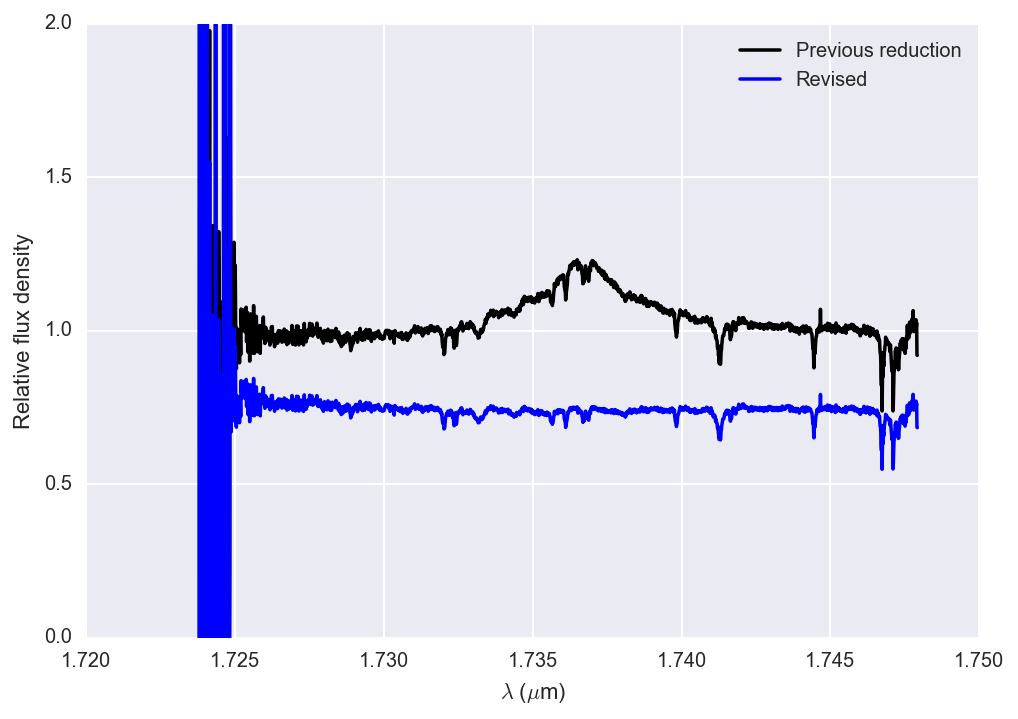

In [10]:
o=5
x = hdu_tar[1].data[o, :]
y1 = hdu_tar[0].data[o, :]/hdu_raw[0].data[o, :]
y2 = f_star[o, :]

plt.plot(x, y1, 'k-', label='Previous reduction')
plt.plot(x, y2, 'b-', label='Revised')

plt.legend(loc='best')

plt.ylim(0, 2)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Relative flux density");

## Much better!